In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

## Single Electron Transistor

We calculate the output current for a one-nanoparticle network under varied input voltages.

### Variable Input Voltage

In [3]:
net = Network(1,1,1,[[0,0,0],[0,0,0]])
mf = MeanField(net)

In [4]:
Us = np.linspace(-0.1, 0.1, 100)
Is = np.zeros(100)

for i, U in enumerate(Us):
    net.set_voltage_config([U, 0], 0)
    Is[i] = -mf.calc_expected_electrode_current(mf.confidence_based_solve(eps = 0.01), 1) * CONST.electron_charge

In [5]:
# KMC data
_, U_data, I_data = np.loadtxt("../out/set_0.0.csv", unpack = True, skiprows = 1, delimiter = ",")
I_data = I_data / 1000 * CONST.electron_charge

Text(0.5, 1.0, 'single-electron-transistor for U_gate = 0V')

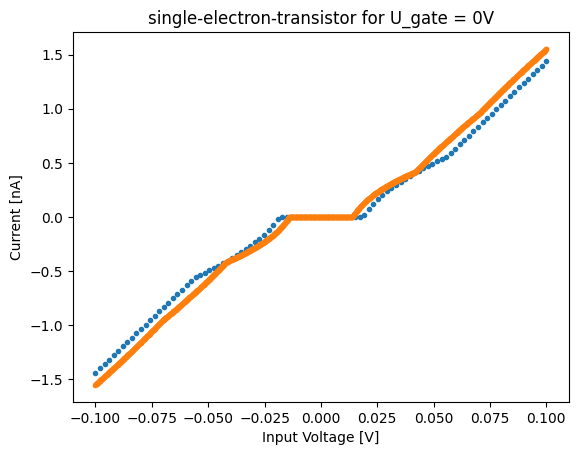

In [6]:
plt.scatter(Us, Is, marker = ".")
plt.scatter(U_data, I_data, marker = ".")
plt.xlabel("Input Voltage [V]")
plt.ylabel("Current [nA]")
plt.title("single-electron-transistor for U_gate = 0V")

### Variable Gate Voltage

In [90]:
net = Network(1,1,1,[[0,0,0],[0,0,0]])
mf = MeanField(net)

In [91]:
Us = np.linspace(-0.2, 0.2, 800)
Is1 = np.zeros(800)
Is2 = np.zeros(800)
Is3 = np.zeros(800)

for i, U in enumerate(Us):
    net.set_voltage_config([0.01, 0], U)
    Is1[i] = -mf.calc_expected_electrode_current(mf.confidence_based_solve(eps = 1e-7), 1) * CONST.electron_charge

    net.set_voltage_config([0.02, 0], U)
    Is2[i] = -mf.calc_expected_electrode_current(mf.confidence_based_solve(eps = 1e-7), 1) * CONST.electron_charge

    net.set_voltage_config([0.03, 0], U)
    Is3[i] = -mf.calc_expected_electrode_current(mf.confidence_based_solve(eps = 1e-7), 1) * CONST.electron_charge

Text(0, 0.5, 'I_out [nA]')

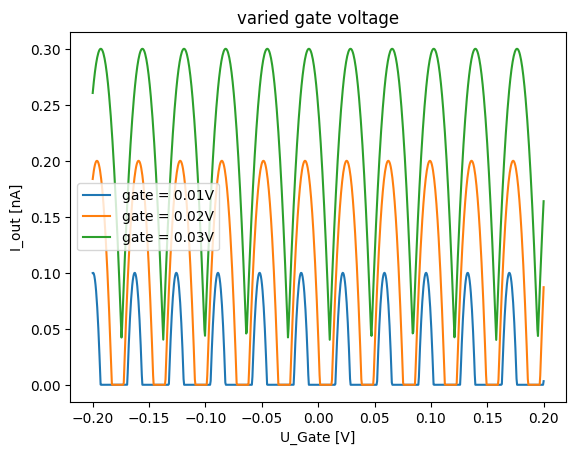

In [92]:
plt.plot(Us, Is1, label = "gate = 0.01V")
plt.plot(Us, Is2, label = "gate = 0.02V")
plt.plot(Us, Is3, label = "gate = 0.03V")
plt.title("varied gate voltage")
plt.legend()
plt.xlabel("U_Gate [V]")
plt.ylabel("I_out [nA]")